## Updating sklearn

In [ ]:
# !pip uninstall scikit-learn -y

# !pip install -U scikit-learn

import sklearn
sklearn.__version__

'1.3.2'

# Reading data

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("data after EDA.xlsx")
print(df.shape)
df

(9468, 6)


,Unnamed: 0,AT,V,AP,RH,PE
0,0,10.54,34.03,1018.71,74.00,478.77
1,1,7.08,39.99,1010.55,91.44,482.83
2,2,14.49,41.16,1000.50,82.17,465.24
3,3,10.73,25.36,1009.35,100.15,469.43
4,4,22.88,63.91,1009.63,87.82,442.50
...,...,...,...,...,...,...
9463,9563,24.99,58.79,1016.37,67.16,439.20
9464,9564,14.22,44.99,1012.00,75.28,460.53
9465,9565,18.76,52.90,1016.27,64.70,458.26
9466,9566,24.82,66.54,1010.00,60.36,440.88


In [ ]:
df = df.iloc[:, 1:]
print(df.shape)
df

(9468, 5)


,AT,V,AP,RH,PE
0,10.54,34.03,1018.71,74.00,478.77
1,7.08,39.99,1010.55,91.44,482.83
2,14.49,41.16,1000.50,82.17,465.24
3,10.73,25.36,1009.35,100.15,469.43
4,22.88,63.91,1009.63,87.82,442.50
...,...,...,...,...,...
9463,24.99,58.79,1016.37,67.16,439.20
9464,14.22,44.99,1012.00,75.28,460.53
9465,18.76,52.90,1016.27,64.70,458.26
9466,24.82,66.54,1010.00,60.36,440.88


# Setting up train and test data

In [ ]:
X = df.iloc[:, :-1]  #független változók
y = df.iloc[:, -1]   #függő változók
print(X.shape)
print(y.shape)

(9468, 4)
(9468,)


In [ ]:
#Train-test felosztás sklearn.model_selection.train_test_split()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6627, 4)
(2841, 4)
(6627,)
(2841,)


# Feature selection

Stepwise regression

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [ ]:
#1,2,3 változó esetén:
for num in range(1,4):
  sfs = SequentialFeatureSelector(estimator = LinearRegression(), n_features_to_select=num, scoring='r2', direction='backward')
  sfs.fit(X_train, y_train)
  print(f"Javasolt változók {num} változó esetén: {X.columns[sfs.get_support()]}")

Javasolt változók 1 változó esetén: Index(['AT'], dtype='object')
Javasolt változók 2 változó esetén: Index(['AT', 'RH'], dtype='object')
Javasolt változók 3 változó esetén: Index(['AT', 'V', 'RH'], dtype='object')


Exhaustive feature selection for regression

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
lr = LinearRegression()

efs = ExhaustiveFeatureSelector(lr,
          min_features=1,
          max_features=4,
          scoring='neg_mean_squared_error',
          cv=10)

efs.fit(X_train, y_train)
print()
print('Best MSE score:', efs.best_score_ * (-1))
print('Best subset:', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)
#a legjobb eredmény: mind a 4 változót használva

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be


Best MSE score: 20.93612416114128
Best subset: (0, 1, 2, 3)
Best subset (corresponding names): ('AT', 'V', 'AP', 'RH')


# Regression

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import KFold

## Linear

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

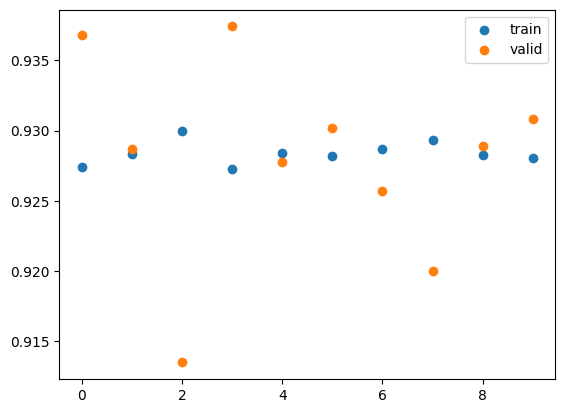

In [ ]:
y_train_val = y_train.to_numpy()
X_train_val = X_train.to_numpy()

kf = KFold(n_splits=10)
r2_train_lr = []
r2_valid_lr =  []

for train, valid in kf.split(X_train_val):
  #minden splithez külön modell
  lr = LinearRegression()
  lr.fit(X_train_val[train], y_train_val[train])

  #minden splithez predikálunk
  lr_train_pred = lr.predict(X_train_val[train])
  lr_valid_pred = lr.predict(X_train_val[valid])

  #minden splithez R2-t számolunk
  r2_train_lr.append(r2_score(y_train_val[train], lr_train_pred))
  r2_valid_lr.append(r2_score(y_train_val[valid], lr_valid_pred))

#az összes split
plt.scatter(range(0,len(r2_train_lr)), r2_train_lr)
plt.scatter(range(0,len(r2_train_lr)), r2_valid_lr)
plt.legend(['train', 'valid'])
#jóank tűnik a modell, nincsenek nagy különbségek

In [ ]:
print(lr.coef_)
print()
print(lr.intercept_)

[-1.96958525 -0.2360919   0.07478795 -0.15967679]

441.8149316307165


In [ ]:
pd.DataFrame(lr.coef_, df.columns[:-1], columns=['lr.coef_'])
# ha negatív akkor fordítottan arányos a függő változóval

,lr.coef_
AT,-1.969585
V,-0.236092
AP,0.074788
RH,-0.159677


In [ ]:
import statsmodels.api as sm

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.146e+04
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:49:49   Log-Likelihood:                -19474.
No. Observations:                6627   AIC:                         3.896e+04
Df Residuals:                    6622   BIC:                         3.899e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        441.1048     12.128     36.372      0.0

In [ ]:
#predikált értékek
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
#MSE
MSE_train_lr = mean_squared_error(y_train, y_train_pred_lr)
MSE_test_lr = mean_squared_error(y_test, y_test_pred_lr)
print(MSE_train_lr, MSE_test_lr)

#RMSE
RMSE_train_lr = root_mean_squared_error(y_train, y_train_pred_lr)
RMSE_test_lr = root_mean_squared_error(y_test, y_test_pred_lr)
print(RMSE_train_lr, RMSE_test_lr)

#R2
R2_train_lr = r2_score(y_train, y_train_pred_lr)
R2_test_lr = r2_score(y_test, y_test_pred_lr)
print(R2_train_lr, R2_test_lr)
#közel esnek egymáshoz -> jó a modell
#ezek az eredmények jónak számítanak

20.88998566469001 20.759493546571196
4.570556384587111 4.556258722523469
0.9283736396770044 0.9274043633674166


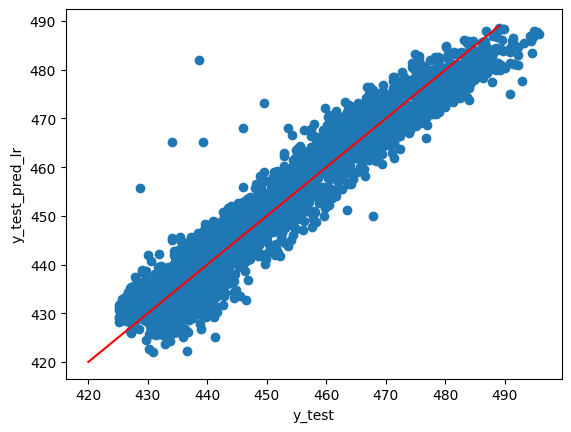

In [ ]:
#együtt ábrázoljuk a valós és predikált értékeket, így vizuálisan is látszik, hogy mennyire jó a modell.  Ha tökéletes, akkor egy egyenesre esnek.
#Itt vannak értékek, amiket lehet ki kéne venni, mert fals adatok lehetnek. Ezek elviletik a predikciót
plt.scatter(y_test, y_test_pred_lr)
plt.xlabel("y_test")
plt.ylabel("y_test_pred_lr")
plt.plot(np.arange(420,490,1), np.arange(420,490,1), color='red')

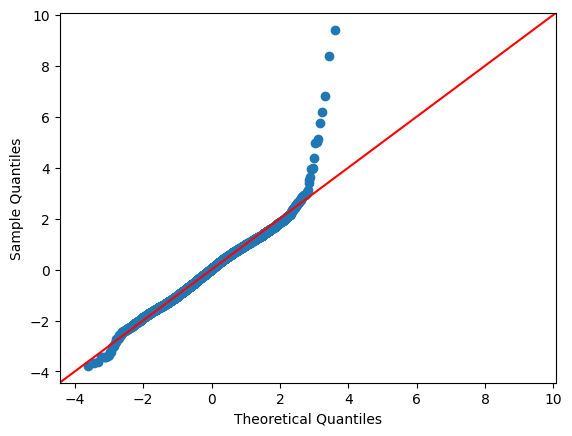

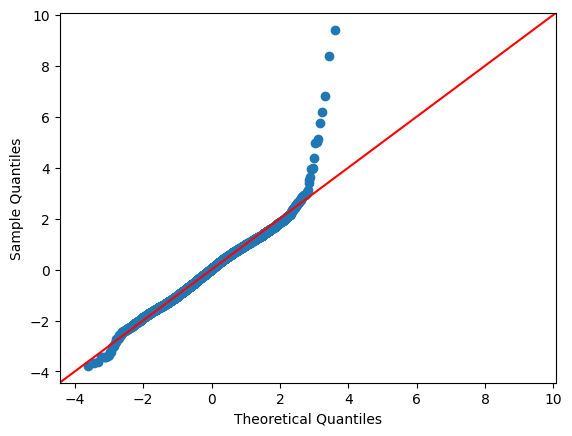

In [ ]:
#megnézzük, hogy a hibák normál eloszlásúak-e
error = y_train_pred_lr - y_train
error_std = (error - np.mean(error)) / np.std(error)
sm.qqplot(error_std, line='45')

## Polynomial

In [ ]:
#polinomiális feature-ök generálása: pl plusz változók az eredetikhez képest: lóerő négyzete, változók kapcsolata-interakciói
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_lr = PolynomialFeatures(degree = 2, interaction_only=False)   #degree=2 másodofkú változók
X_poly = poly_lr.fit_transform(X)  #az eredeti X változókon hozza látre a másodfokú változókat
poly_lr.get_feature_names_out()

array(['1', 'AT', 'V', 'AP', 'RH', 'AT^2', 'AT V', 'AT AP', 'AT RH',
       'V^2', 'V AP', 'V RH', 'AP^2', 'AP RH', 'RH^2'], dtype=object)

In [ ]:
#Train-test felosztás
#ellenőrzés
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3, random_state=42)  #adatok felosztása train és test adatokra
print(X_train_poly.shape)
print(X_test_poly.shape)
print(y_train_poly.shape)
print(y_test_poly.shape)

(6627, 15)
(2841, 15)
(6627,)
(2841,)


In [ ]:
lr_pol = LinearRegression()
lr_pol.fit(X_train_poly, y_train_poly)

LinearRegression()

KFold crossvalidation

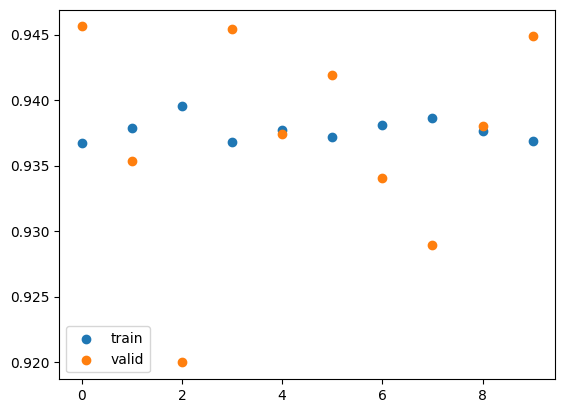

In [ ]:
y_train_poly_val = y_train_poly.values

kf = KFold(n_splits=10)
r2_train_lr_pol = []
r2_valid_lr_pol =  []

for train, valid in kf.split(X_train_poly):
  #minden splithez külön modell
  lr_pol = LinearRegression()
  lr_pol.fit(X_train_poly[train], y_train_poly_val[train])

  #minden splithez predikálunk
  lr_pol_train_pred = lr_pol.predict(X_train_poly[train])
  lr_pol_valid_pred = lr_pol.predict(X_train_poly[valid])

  #minden splithez R2-t számolunk
  r2_train_lr_pol.append(r2_score(y_train_poly_val[train], lr_pol_train_pred))
  r2_valid_lr_pol.append(r2_score(y_train_poly_val[valid], lr_pol_valid_pred))

#az összes split
plt.scatter(range(0,len(r2_train_lr_pol)), r2_train_lr_pol)
plt.scatter(range(0,len(r2_train_lr_pol)), r2_valid_lr_pol)
plt.legend(['train', 'valid'])
#jóank tűnik a modell, nincsenek nagy különbségek

In [ ]:
print(lr.coef_)
print()
print(lr.intercept_)

[-1.96958525 -0.2360919   0.07478795 -0.15967679]

441.8149316307165


In [ ]:
pd.DataFrame(lr_pol.coef_, poly_lr.get_feature_names_out(), columns=['lr_pol_coef'])
# ha negatív akkor fordítottan arányos a függő változóval

,lr_pol_coef
1,0.000000
AT,-3.957440
V,-3.504046
AP,16.587262
RH,4.307359
AT^2,0.016140
AT V,0.010427
AT AP,0.001330
AT RH,-0.005089
V^2,-0.000017


In [ ]:
#predikált értékek
y_train_pred_lr_pol = lr_pol.predict(X_train_poly)
y_test_pred_lr_pol = lr_pol.predict(X_test_poly)

In [ ]:
#MSE
MSE_train_lr_pol = mean_squared_error(y_train, y_train_pred_lr_pol)
MSE_test_lr_pol = mean_squared_error(y_test, y_test_pred_lr_pol)
print(MSE_train_lr_pol, MSE_test_lr_pol)

#RMSE
RMSE_train_lr_pol = root_mean_squared_error(y_train, y_train_pred_lr_pol)
RMSE_test_lr_pol = root_mean_squared_error(y_test, y_test_pred_lr_pol)
print(RMSE_train_lr_pol, RMSE_test_lr_pol)

#R2
R2_train_lr_pol = r2_score(y_train, y_train_pred_lr_pol)
R2_test_lr_pol = r2_score(y_test, y_test_pred_lr_pol)
print(R2_train_lr_pol, R2_test_lr_pol)
#közel esnek egymáshoz -> jó a modell
#ezek az eredmények jónak számítanak

18.175067285689998 18.19887155323542
4.263222640877438 4.266013543489451
0.9376823929324204 0.9363588199568601


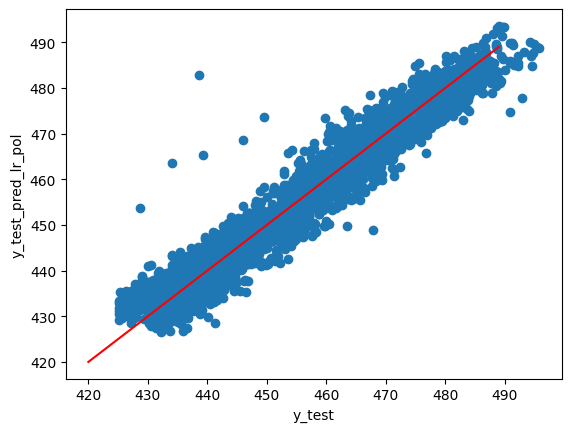

In [ ]:
#együtt ábrázoljuk a valós és predikált értékeket, így vizuálisan is látszik, hogy mennyire jó a modell.  Ha tökéletes, akkor egy egyenesre esnek.
#Itt vannak értékek, amiket lehet ki kéne venni, mert fals adatok lehetnek. Ezek elviletik a predikciót
plt.scatter(y_test, y_test_pred_lr_pol)
plt.xlabel("y_test")
plt.ylabel("y_test_pred_lr_pol")
plt.plot(np.arange(420,490,1), np.arange(420,490,1), color='red')

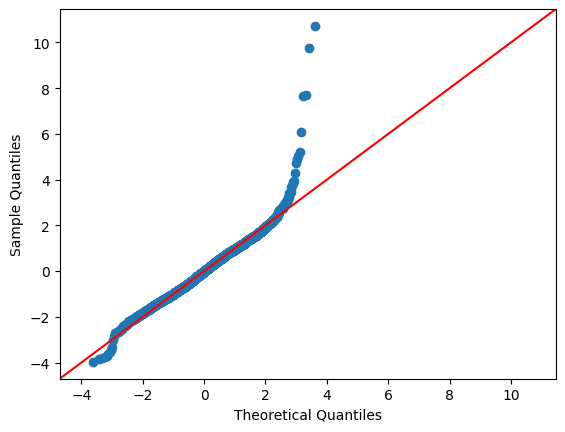

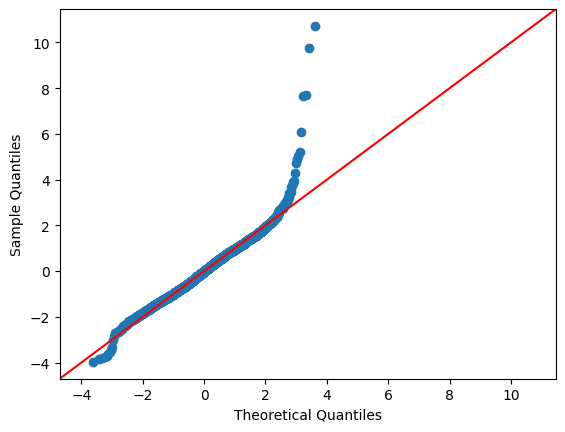

In [ ]:
#megnézzük, hogy a hibák normál eloszlásúak-e
error = y_train_pred_lr_pol - y_train
error_std = (error - np.mean(error)) / np.std(error)
sm.qqplot(error_std, line='45')

## Ridge

In [ ]:
#Ridge az r2-et bünteti
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler    #skálázásért felel

In [ ]:
scaler = StandardScaler()
X_poly_sc = scaler.fit_transform(X_poly)

In [ ]:
##Train-test felosztás
X_train_poly_sc, X_test_poly_sc, y_train_poly_sc, y_test_poly_sc = train_test_split(X_poly_sc, y, test_size=0.3, random_state=42)
# elég ha csak a független változókat skálázzuk, a függőt (y) nem kell
print(X_train_poly_sc.shape)
print(X_test_poly_sc.shape)
print(y_train_poly_sc.shape)
print(y_test_poly_sc.shape)

(6627, 15)
(2841, 15)
(6627,)
(2841,)


gridsearch

In [ ]:
#legjobb alpha meghatározása gridsearch-el
from sklearn.model_selection import GridSearchCV

alpha_array = np.linspace(0.001,20,100).tolist()
ridge_params = {'alpha': alpha_array}
ridge_gridsearch = GridSearchCV(estimator=Ridge(), param_grid=ridge_params, scoring="r2", cv=5, return_train_score=True)
ridge_gridsearch.fit(X_train_poly_sc, y_train_poly_sc)
ridge_gridsearch.best_params_

{'alpha': 0.001}

In [ ]:
#betanítjuk a modellt
ridge = Ridge(alpha=0.001)      # az alpha a büntető paraméter (diában a lambda 𝜆)
ridge.fit(X_train_poly_sc, y_train_poly_sc)

Ridge(alpha=0.001)

KFold crossvalidation

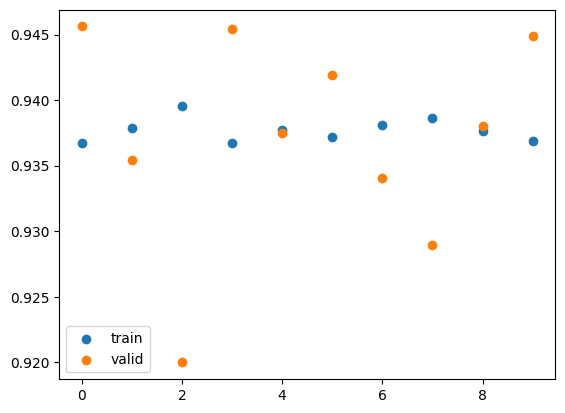

In [ ]:
y_train_poly_sc_val = y_train_poly_sc.values

kf = KFold(n_splits=10)
r2_train_ridge = []
r2_valid_ridge =  []

for train, valid in kf.split(X_train_poly_sc):
  #minden splithez külön modell
  ridge = Ridge(alpha=0.001)
  ridge.fit(X_train_poly_sc[train], y_train_poly_sc_val[train])

  #minden splithez predikálunk
  ridge_train_pred = ridge.predict(X_train_poly_sc[train])
  ridge_valid_pred = ridge.predict(X_train_poly_sc[valid])

  #minden splithez R2-t számolunk
  r2_train_ridge.append(r2_score(y_train_poly_sc_val[train], ridge_train_pred))
  r2_valid_ridge.append(r2_score(y_train_poly_sc_val[valid], ridge_valid_pred))

#az összes split
plt.scatter(range(0,len(r2_train_ridge)), r2_train_ridge)
plt.scatter(range(0,len(r2_train_ridge)), r2_valid_ridge)
plt.legend(['train', 'valid'])
#jóank tűnik a modell, nincsenek nagy különbségek

In [ ]:
print(ridge.coef_)
print()
print(ridge.intercept_)

[ 0.00000000e+00 -3.37946409e+01 -4.22530555e+01  9.07662698e+01
  6.02844704e+01  4.73974079e+00  6.51902320e+00  1.42188944e+01
 -2.33854422e+00 -1.04427724e-02  3.56187097e+01 -2.20730524e-01
 -8.94652814e+01 -5.74357565e+01 -3.09451949e+00]

454.19735893025313


In [ ]:
pd.DataFrame(ridge.coef_, poly_lr.get_feature_names_out(), columns=['ridge_coef'])

,ridge_coef
1,0.000000
AT,-33.794641
V,-42.253056
AP,90.766270
RH,60.284470
AT^2,4.739741
AT V,6.519023
AT AP,14.218894
AT RH,-2.338544
V^2,-0.010443


In [ ]:
#predikált értékek
y_train_pred_ridge_pol = ridge.predict(X_train_poly_sc)
y_test_pred_ridge_pol = ridge.predict(X_test_poly_sc)

In [ ]:
#MSE
MSE_train_ridge_pol = mean_squared_error(y_train_poly_sc, y_train_pred_ridge_pol)
MSE_test_ridge_pol = mean_squared_error(y_test_poly_sc, y_test_pred_ridge_pol)
print(MSE_train_ridge_pol, MSE_test_ridge_pol)

#RMSE
RMSE_train_ridge_pol = root_mean_squared_error(y_train_poly_sc, y_train_pred_ridge_pol)
RMSE_test_ridge_pol = root_mean_squared_error(y_test_poly_sc, y_test_pred_ridge_pol)
print(RMSE_train_ridge_pol, RMSE_test_ridge_pol)

#R2
R2_train_ridge_pol = r2_score(y_train_poly_sc, y_train_pred_ridge_pol)
R2_test_ridge_pol = r2_score(y_test_poly_sc, y_test_pred_ridge_pol)
print(R2_train_ridge_pol, R2_test_ridge_pol)
#közel esnek egymáshoz -> jó a modell
#ezek az eredmények jónak számítanak

18.175473198974327 18.198903452171127
4.263270247002215 4.266017282216649
0.937681001160706 0.9363587084067618


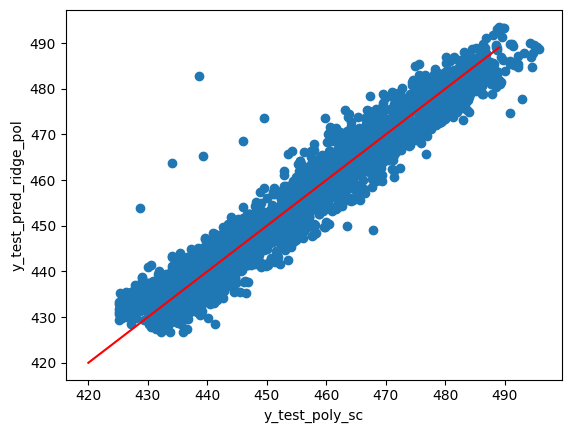

In [ ]:
#együtt ábrázoljuk a valós és predikált értékeket, így vizuálisan is látszik, hogy mennyire jó a modell.  Ha tökéletes, akkor egy egyenesre esnek.
#Itt vannak értékek, amiket lehet ki kéne venni, mert fals adatok lehetnek. Ezek elviletik a predikciót
plt.scatter(y_test_poly_sc, y_test_pred_ridge_pol)
plt.xlabel("y_test_poly_sc")
plt.ylabel("y_test_pred_ridge_pol")
plt.plot(np.arange(420,490,1), np.arange(420,490,1), color='red')

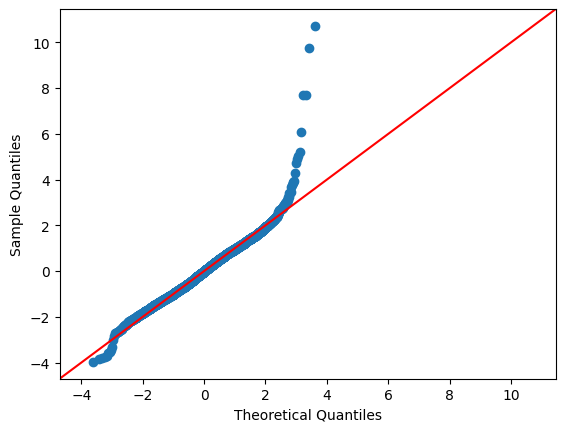

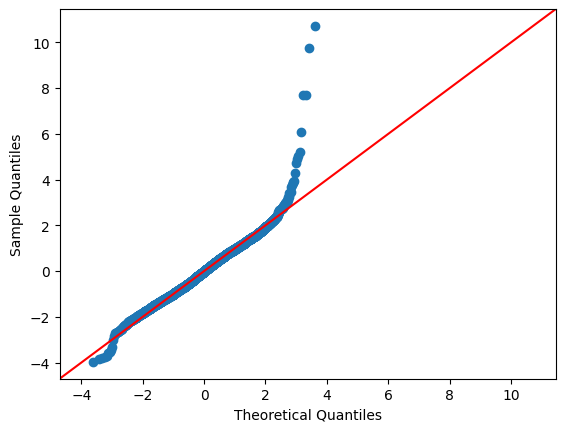

In [ ]:
#megnézzük, hogy a hibák normál eloszlásúak-e
error = y_train_pred_ridge_pol - y_train_poly_sc
error_std = (error - np.mean(error)) / np.std(error)
sm.qqplot(error_std, line='45')

## Lasso

In [ ]:
from sklearn.linear_model import Lasso

gridsearch

In [ ]:
#legjobb alpha meghatározása gridsearch-el
from sklearn.model_selection import GridSearchCV

alpha_array = np.linspace(0.001,20,100).tolist()
lasso_params = {'alpha': alpha_array}
lasso_gridsearch = GridSearchCV(estimator=Lasso(), param_grid=lasso_params, scoring="r2", cv=5, return_train_score=True, verbose=1)
lasso_gridsearch.fit(X_train_poly_sc, y_train_poly_sc)
lasso_gridsearch.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'alpha': 0.001}

In [ ]:
#betanítjuk a modellt
lasso = Lasso(alpha=0.001)      # az alpha a büntető paraméter (diában a lambda 𝜆)
lasso.fit(X_train_poly_sc, y_train_poly_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.308e+04, tolerance: 1.933e+02
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

KFold crossvalidation

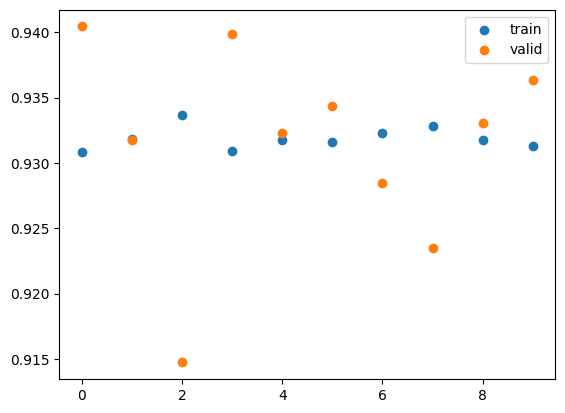

In [ ]:
y_train_poly_sc_val = y_train_poly_sc.values

kf = KFold(n_splits=10)
r2_train_lasso = []
r2_valid_lasso =  []

for train, valid in kf.split(X_train_poly_sc):
  #minden splithez külön modell
  lasso = Lasso(alpha=0.1)
  lasso.fit(X_train_poly_sc[train], y_train_poly_sc_val[train])

  #minden splithez predikálunk
  lasso_train_pred = lasso.predict(X_train_poly_sc[train])
  lasso_valid_pred = lasso.predict(X_train_poly_sc[valid])

  #minden splithez R2-t számolunk
  r2_train_lasso.append(r2_score(y_train_poly_sc_val[train], lasso_train_pred))
  r2_valid_lasso.append(r2_score(y_train_poly_sc_val[valid], lasso_valid_pred))

#az összes split
plt.scatter(range(0,len(r2_train_lasso)), r2_train_lasso)
plt.scatter(range(0,len(r2_train_lasso)), r2_valid_lasso)
plt.legend(['train', 'valid'])
#jóank tűnik a modell, nincsenek nagy különbségek

In [ ]:
print(lasso.coef_)
print()
print(lasso.intercept_)

[ 0.00000000e+00 -1.04514900e+01 -2.84616389e+00  3.53626819e-01
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -1.97681150e-03
 -3.69548797e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]

454.20347085743725


In [ ]:
pd.DataFrame(lasso.coef_, poly_lr.get_feature_names_out(), columns=['lasso_coef'])

,lasso_coef
1,0.000000
AT,-10.451490
V,-2.846164
AP,0.353627
RH,0.000000
AT^2,0.000000
AT V,-0.000000
AT AP,-0.001977
AT RH,-3.695488
V^2,-0.000000


In [ ]:
#predikált értékek
y_train_pred_lasso_pol = lasso.predict(X_train_poly_sc)
y_test_pred_lasso_pol = lasso.predict(X_test_poly_sc)

In [ ]:
#MSE
MSE_train_lasso_pol = mean_squared_error(y_train_poly_sc, y_train_pred_lasso_pol)
MSE_test_lasso_pol = mean_squared_error(y_test_poly_sc, y_test_pred_lasso_pol)
print(MSE_train_lasso_pol, MSE_test_lasso_pol)

#RMSE
RMSE_train_lasso_pol = root_mean_squared_error(y_train_poly_sc, y_train_pred_lasso_pol)
RMSE_test_lasso_pol = root_mean_squared_error(y_test_poly_sc, y_test_pred_lasso_pol)
print(RMSE_train_lasso_pol, RMSE_test_lasso_pol)

#R2
R2_train_lasso_pol = r2_score(y_train_poly_sc, y_train_pred_lasso_pol)
R2_test_lasso_pol = r2_score(y_test_poly_sc, y_test_pred_lasso_pol)
print(R2_train_lasso_pol, R2_test_lasso_pol)
#közel esnek egymáshoz -> jó a modell
#ezek az eredmények jónak számítanak

19.876936630182282 19.962955688757493
4.458355821396749 4.4679923554945224
0.9318471229208518 0.9301898442733075


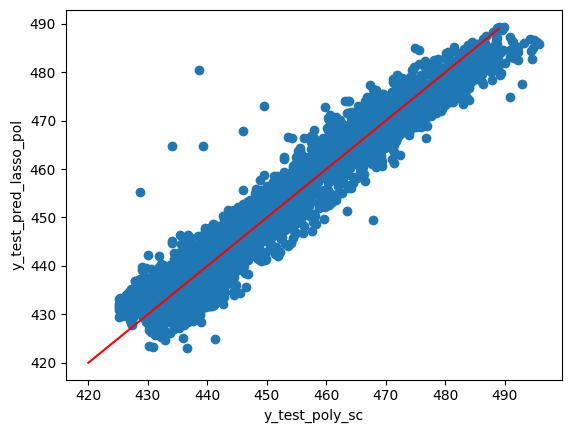

In [ ]:
#együtt ábrázoljuk a valós és predikált értékeket, így vizuálisan is látszik, hogy mennyire jó a modell.  Ha tökéletes, akkor egy egyenesre esnek.
#Itt vannak értékek, amiket lehet ki kéne venni, mert fals adatok lehetnek. Ezek elviletik a predikciót
plt.scatter(y_test_poly_sc, y_test_pred_lasso_pol)
plt.xlabel("y_test_poly_sc")
plt.ylabel("y_test_pred_lasso_pol")
plt.plot(np.arange(420,490,1), np.arange(420,490,1), color='red')

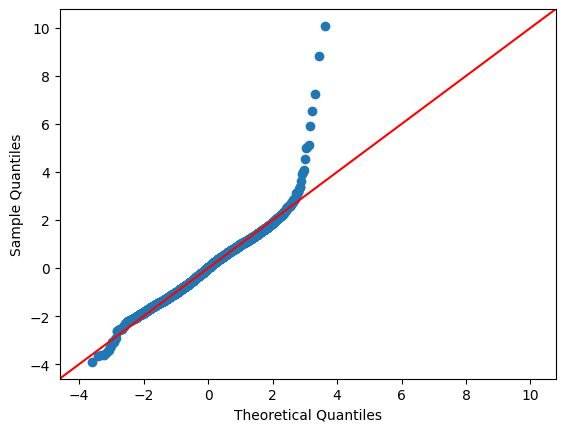

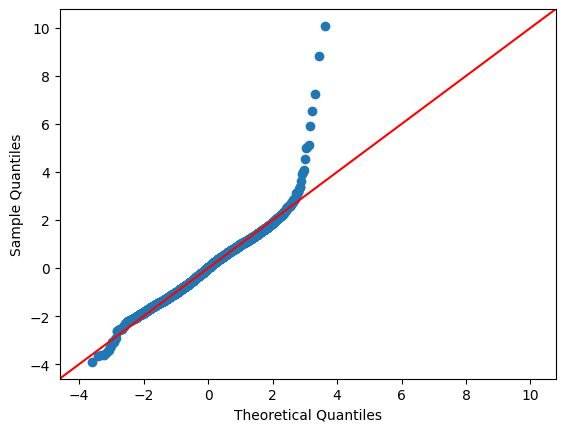

In [ ]:
#megnézzük, hogy a hibák normál eloszlásúak-e
error = y_train_pred_lasso_pol - y_train_poly_sc
error_std = (error - np.mean(error)) / np.std(error)
sm.qqplot(error_std, line='45')

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#legjobb alpha meghatározása gridsearch-el
from sklearn.model_selection import GridSearchCV

knn_params = [{'n_neighbors': [2,3,4,5,6,7,8,9,10], 'p': [1,2]}]
knn_gridsearch = GridSearchCV(estimator=KNeighborsRegressor(), param_grid = knn_params, scoring="r2", cv=5, return_train_score=True, verbose=1)
knn_gridsearch.fit(X_train_poly_sc, y_train_poly_sc)
knn_gridsearch.best_params_
knn_gridsearch.best_score_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


0.9517334962166902

In [ ]:
#betanítjuk a modellt
knn = KNeighborsRegressor(n_neighbors=4, p=1)
knn.fit(X_train_poly_sc, y_train_poly_sc)

KNeighborsRegressor(n_neighbors=4, p=1)

KFold crossvalidation

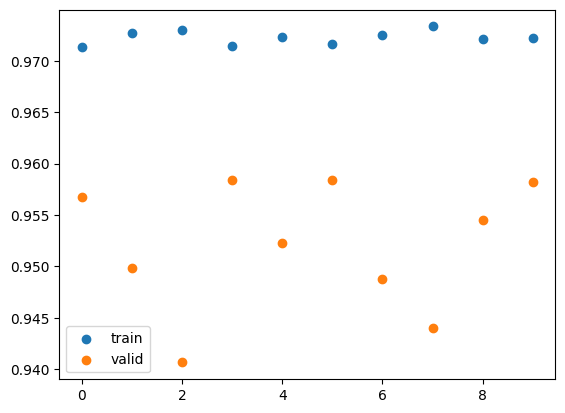

In [ ]:
y_train_poly_sc_val = y_train_poly_sc.values

kf = KFold(n_splits=10)
r2_train_knn = []
r2_valid_knn =  []

for train, valid in kf.split(X_train_poly_sc):
  #minden splithez külön modell
  knn = KNeighborsRegressor(n_neighbors=4, p=1)
  knn.fit(X_train_poly_sc[train], y_train_poly_sc_val[train])

  #minden splithez predikálunk
  knn_train_pred = knn.predict(X_train_poly_sc[train])
  knn_valid_pred = knn.predict(X_train_poly_sc[valid])

  #minden splithez R2-t számolunk
  r2_train_knn.append(r2_score(y_train_poly_sc_val[train], knn_train_pred))
  r2_valid_knn.append(r2_score(y_train_poly_sc_val[valid], knn_valid_pred))

#az összes split
plt.scatter(range(0,len(r2_train_knn)), r2_train_knn)
plt.scatter(range(0,len(r2_train_knn)), r2_valid_knn)
plt.legend(['train', 'valid'])
#jóank tűnik a modell, nincsenek nagy különbségek

In [ ]:
#predikált értékek
y_train_pred_knn_pol = knn.predict(X_train_poly_sc)
y_test_pred_knn_pol = knn.predict(X_test_poly_sc)

In [ ]:
#MSE
MSE_train_knn_pol = mean_squared_error(y_train_poly_sc, y_train_pred_knn_pol)
MSE_test_knn_pol = mean_squared_error(y_test_poly_sc, y_test_pred_knn_pol)
print(MSE_train_knn_pol, MSE_test_knn_pol)

#RMSE
RMSE_train_knn_pol = root_mean_squared_error(y_train_poly_sc, y_train_pred_knn_pol)
RMSE_test_knn_pol = root_mean_squared_error(y_test_poly_sc, y_test_pred_knn_pol)
print(RMSE_train_knn_pol, RMSE_test_knn_pol)

#R2
R2_train_knn_pol = r2_score(y_train_poly_sc, y_train_pred_knn_pol)
R2_test_knn_pol = r2_score(y_test_poly_sc, y_test_pred_knn_pol)
print(R2_train_knn_pol, R2_test_knn_pol)
#közel esnek egymáshoz -> jó a modell
#ezek az eredmények jónak számítanak

8.495819396974502 15.26620997448081
2.914758891739504 3.9071997612715954
0.9708700316441399 0.9466142933796582


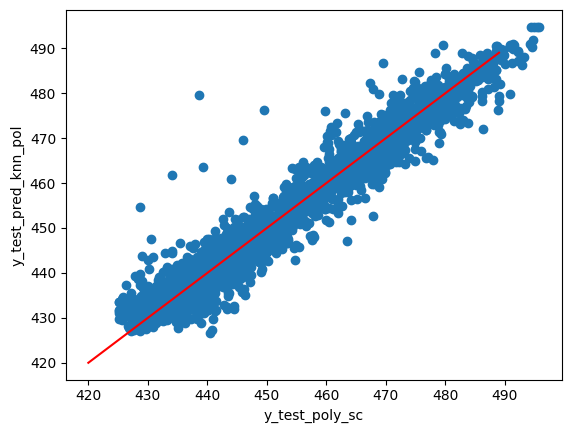

In [ ]:
#együtt ábrázoljuk a valós és predikált értékeket, így vizuálisan is látszik, hogy mennyire jó a modell.  Ha tökéletes, akkor egy egyenesre esnek.
#Itt vannak értékek, amiket lehet ki kéne venni, mert fals adatok lehetnek. Ezek elviletik a predikciót
plt.scatter(y_test_poly_sc, y_test_pred_knn_pol)
plt.xlabel("y_test_poly_sc")
plt.ylabel("y_test_pred_knn_pol")
plt.plot(np.arange(420,490,1), np.arange(420,490,1), color='red')

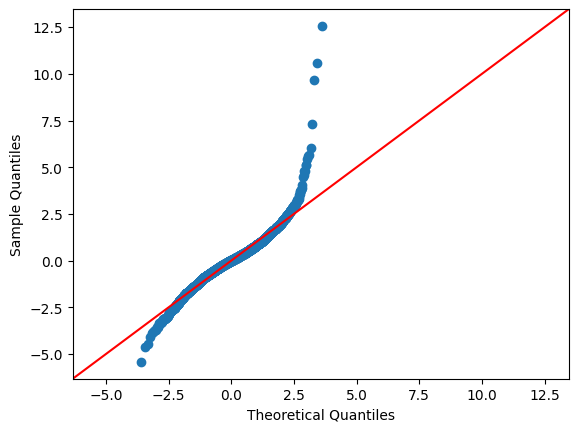

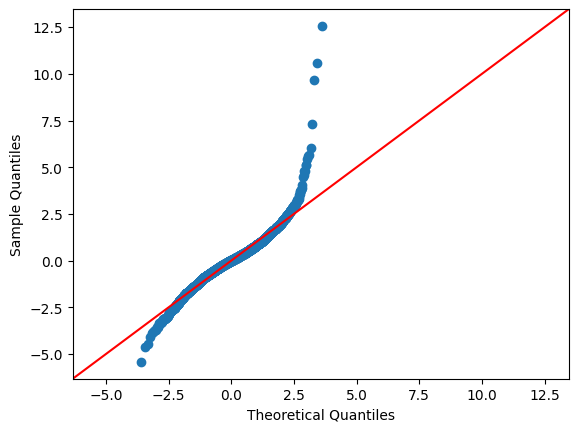

In [ ]:
#megnézzük, hogy a hibák normál eloszlásúak-e
error = y_train_pred_knn_pol - y_train_poly_sc
error_std = (error - np.mean(error)) / np.std(error)
sm.qqplot(error_std, line='45')

# Summary

In [ ]:
print("linear")
print(MSE_train_lr, MSE_test_lr)
print(RMSE_train_lr, RMSE_test_lr)
print(R2_train_lr, R2_test_lr)
print()

print("polynomial")
print(MSE_train_lr_pol, MSE_test_lr_pol)
print(RMSE_train_lr_pol, RMSE_test_lr_pol)
print(R2_train_lr_pol, R2_test_lr_pol)
print()

print("ridge")
print(MSE_train_ridge_pol, MSE_test_ridge_pol)
print(RMSE_train_ridge_pol, RMSE_test_ridge_pol)
print(R2_train_ridge_pol, R2_test_ridge_pol)
print()

print("lasso")
print(MSE_train_lasso_pol, MSE_test_lasso_pol)
print(RMSE_train_lasso_pol, RMSE_test_lasso_pol)
print(R2_train_lasso_pol, R2_test_lasso_pol)
print()

print("knn")
print(MSE_train_knn_pol, MSE_test_knn_pol)
print(RMSE_train_knn_pol, RMSE_test_knn_pol)
print(R2_train_knn_pol, R2_test_knn_pol)

linear
20.88998566469001 20.759493546571196
4.570556384587111 4.556258722523469
0.9283736396770044 0.9274043633674166

polynomial
18.175067285689998 18.19887155323542
4.263222640877438 4.266013543489451
0.9376823929324204 0.9363588199568601

ridge
18.175473198974327 18.198903452171127
4.263270247002215 4.266017282216649
0.937681001160706 0.9363587084067618

lasso
19.876936630182282 19.962955688757493
4.458355821396749 4.4679923554945224
0.9318471229208518 0.9301898442733075

knn
8.495819396974502 15.26620997448081
2.914758891739504 3.9071997612715954
0.9708700316441399 0.9466142933796582


In [ ]:
data_sum = { 'Regression method': ['Linear', 'Polynomial', 'Ridge', 'Lasso', 'kNN'],
            'MSE':  [MSE_test_lr, MSE_test_lr_pol, MSE_test_ridge_pol, MSE_test_lasso_pol, MSE_test_knn_pol],
            'RMSE': [RMSE_test_lr, RMSE_test_lr_pol, RMSE_test_ridge_pol, RMSE_test_lasso_pol, RMSE_test_knn_pol],
            'R2':   [R2_test_lr, R2_test_lr_pol, R2_test_ridge_pol, R2_test_lasso_pol, R2_test_knn_pol]}
df_sum = pd.DataFrame(data_sum)
df_sum

,Regression method,MSE,RMSE,R2
0,Linear,20.759494,4.556259,0.927404
1,Polynomial,18.198872,4.266014,0.936359
2,Ridge,18.198903,4.266017,0.936359
3,Lasso,19.962956,4.467992,0.930190
4,kNN,15.266210,3.907200,0.946614


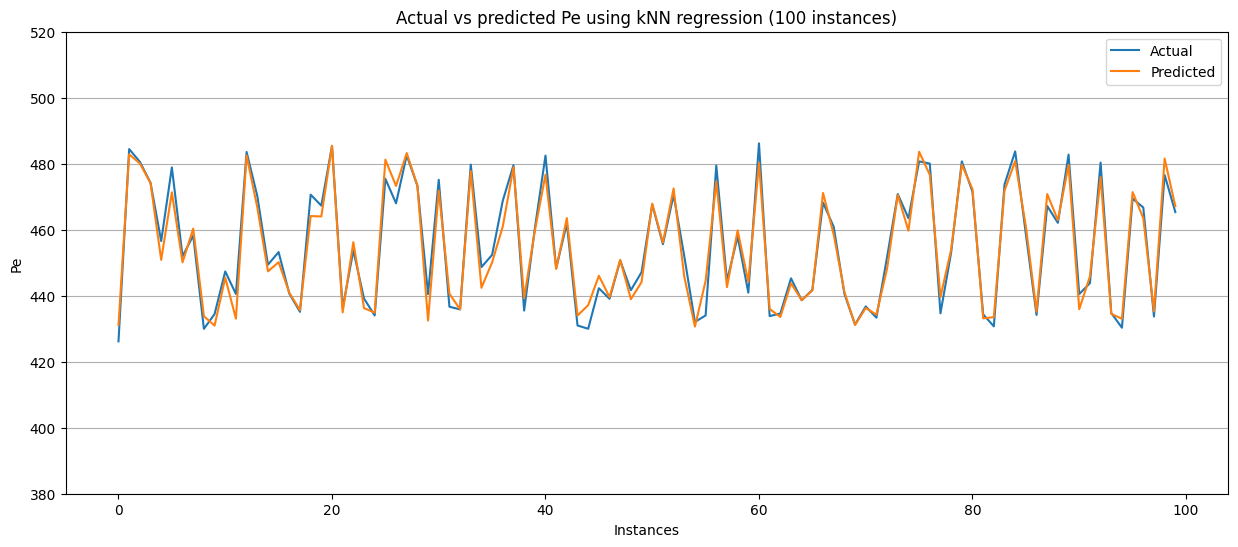

In [ ]:
plt.figure(figsize=(15,6))
plt.ylim(380, 520)
plt.grid(axis='y')
plt.plot(np.arange(0,100,1), y_test[0:100,], label="Actual")
plt.plot(np.arange(0,100,1), y_test_pred_knn_pol[0:100,], label="Predicted")
plt.title('Actual vs predicted Pe using kNN regression (100 instances)')
plt.xlabel('Instances')
plt.ylabel('Pe')
plt.legend()
plt.show()